In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('data.json')
df

,group_id,click_count,impression_count,conversion_count,date
0,52740,0,1,0,2024-01-22
1,52758,0,1,0,2024-01-22
2,64336,2,12,0,2024-01-22
3,186281,0,1,0,2024-01-22
4,52708,0,4,0,2024-01-22
...,...,...,...,...,...
56554,161436,1,7,0,2025-02-02
56555,52909,0,8,0,2025-02-02
56556,103359,0,3,0,2025-02-02
56557,1094,37,190,3,2025-02-02


In [3]:
# Making an aggregation right away
df = df.groupby('date').agg({
    'group_id': 'nunique',  # Count unique group_ids per date (optional, if needed)
    'click_count': 'sum',   # Sum the click_count for each date
    'impression_count': 'sum',  # Sum the impression_count for each date
    'conversion_count': 'sum'   # Sum the conversion_count for each date (target column)
}).reset_index()

df

,date,group_id,click_count,impression_count,conversion_count
0,2024-01-22,64,134,2815,4
1,2024-01-23,84,1531,9990,7
2,2024-01-24,73,1695,15717,18
3,2024-01-25,87,434,7232,3
4,2024-01-26,88,290,4912,5
...,...,...,...,...,...
365,2025-01-29,212,207,4648,45
366,2025-01-30,226,505,5280,69
367,2025-01-31,222,570,5107,75
368,2025-02-01,209,263,4866,73


# Data Visualization

Text(0.5, 1.0, 'Conversion Count')

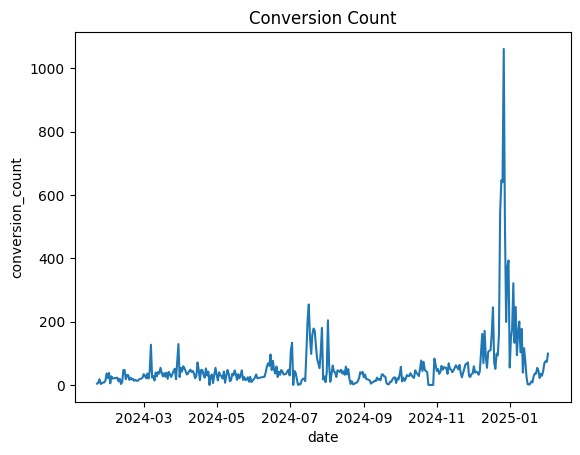

In [4]:
sns.lineplot(data = df,x = 'date',y = 'conversion_count')
plt.title('Conversion Count')

Text(0.5, 1.0, 'Click Count')

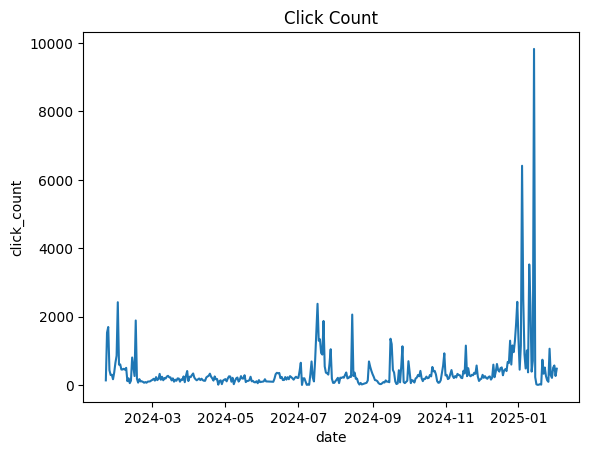

In [5]:
sns.lineplot(data = df,x = 'date',y = 'click_count')
plt.title('Click Count')

Text(0.5, 1.0, 'Impression Count')

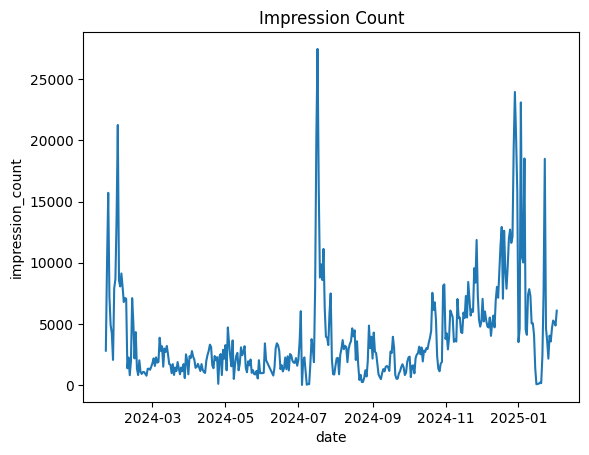

In [6]:
sns.lineplot(data = df,x = 'date',y = 'impression_count')
plt.title('Impression Count')

<Axes: >

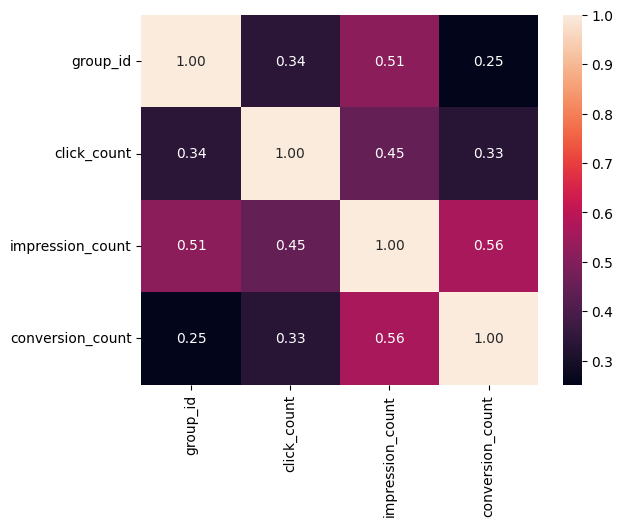

In [7]:
sns.heatmap(data = df.select_dtypes(include = ['int']).corr(),annot = True,fmt = '.2f')

# Feature Engineering

In [8]:
# Time based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

# Turkish Holidays
holidays = ["2024-01-01", "2024-04-23", "2024-05-01", "2024-05-19", "2024-07-15", "2024-08-30", "2024-10-29"]
df["is_holiday"] = df["date"].astype(str).isin(holidays).astype(int)

# Lags
lags = [3, 7, 15]
for lag in lags:
    df[f"conversion_lag_{lag}"] = df["conversion_count"].shift(lag)

df


,date,group_id,click_count,impression_count,conversion_count,year,month,weekday,dayofyear,is_weekend,is_holiday,conversion_lag_3,conversion_lag_7,conversion_lag_15
0,2024-01-22,64,134,2815,4,2024,1,0,22,0,0,NaN,NaN,NaN
1,2024-01-23,84,1531,9990,7,2024,1,1,23,0,0,NaN,NaN,NaN
2,2024-01-24,73,1695,15717,18,2024,1,2,24,0,0,NaN,NaN,NaN
3,2024-01-25,87,434,7232,3,2024,1,3,25,0,0,4.0,NaN,NaN
4,2024-01-26,88,290,4912,5,2024,1,4,26,0,0,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2025-01-29,212,207,4648,45,2025,1,2,29,0,0,22.0,36.0,76.0
366,2025-01-30,226,505,5280,69,2025,1,3,30,0,0,35.0,36.0,26.0
367,2025-01-31,222,570,5107,75,2025,1,4,31,0,0,29.0,54.0,2.0
368,2025-02-01,209,263,4866,73,2025,2,5,32,1,0,45.0,45.0,1.0


In [9]:
# Since we don't have any information about previous days prior to first day we fill NaN's with 0's

df.fillna(0, inplace = True)
df

,date,group_id,click_count,impression_count,conversion_count,year,month,weekday,dayofyear,is_weekend,is_holiday,conversion_lag_3,conversion_lag_7,conversion_lag_15
0,2024-01-22,64,134,2815,4,2024,1,0,22,0,0,0.0,0.0,0.0
1,2024-01-23,84,1531,9990,7,2024,1,1,23,0,0,0.0,0.0,0.0
2,2024-01-24,73,1695,15717,18,2024,1,2,24,0,0,0.0,0.0,0.0
3,2024-01-25,87,434,7232,3,2024,1,3,25,0,0,4.0,0.0,0.0
4,2024-01-26,88,290,4912,5,2024,1,4,26,0,0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2025-01-29,212,207,4648,45,2025,1,2,29,0,0,22.0,36.0,76.0
366,2025-01-30,226,505,5280,69,2025,1,3,30,0,0,35.0,36.0,26.0
367,2025-01-31,222,570,5107,75,2025,1,4,31,0,0,29.0,54.0,2.0
368,2025-02-01,209,263,4866,73,2025,2,5,32,1,0,45.0,45.0,1.0


In [10]:
from prophet import Prophet

# Define a prophet DataFrame with proper naming
df_prophet = df.rename(columns={"date": "ds", "conversion_count": "y"})

# Turn Date into date format
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Create a prophet object
model = Prophet()

model.add_regressor('click_count')
model.add_regressor('month')
model.add_regressor('impression_count')
model.add_regressor('weekday')
model.add_regressor('dayofyear')
model.add_regressor('is_weekend')
model.add_regressor('is_holiday')

model.fit(df_prophet)

15:39:58 - cmdstanpy - INFO - Chain [1] start processing
15:39:59 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Make future dataframe 7 days long
future = model.make_future_dataframe(periods=7)

future['click_count'] = df['click_count'].iloc[-1]  
future['month'] = df['month'].iloc[-1]  
future['impression_count'] = df['impression_count'].iloc[-1] 
future['weekday'] = df['weekday'].iloc[-1]
future['dayofyear'] = df['dayofyear'].iloc[-1]
future['is_weekend'] = df['is_weekend'].iloc[-1]
future['is_holiday'] = df['is_holiday'].iloc[-1]
# Prediction
forecast = model.predict(future)

# 7 days forecasting
forecast_7_days = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
forecast_7_days


,ds,yhat,yhat_lower,yhat_upper
0,2024-01-22,35.891650,-44.625525,125.605062
1,2024-01-23,39.359164,-52.013714,126.010916
2,2024-01-24,42.313271,-42.941325,121.111491
3,2024-01-25,39.608951,-50.810702,124.021218
4,2024-01-26,51.038261,-37.898278,142.666531
...,...,...,...,...
372,2025-02-05,115.017954,30.958351,203.945534
373,2025-02-06,113.627833,27.153404,194.767861
374,2025-02-07,126.371344,45.844368,215.869271
375,2025-02-08,113.167325,25.311151,198.734986


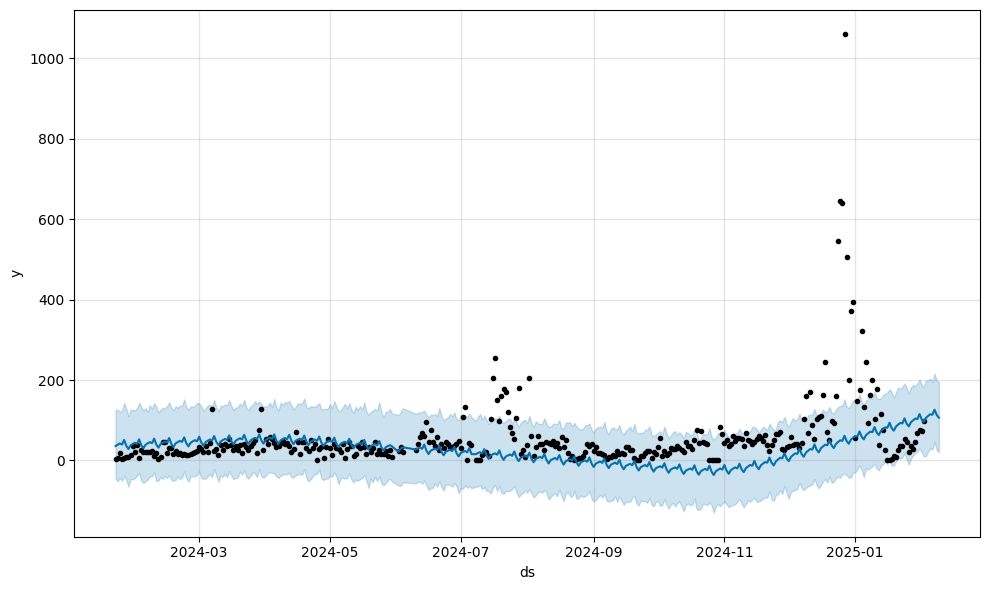

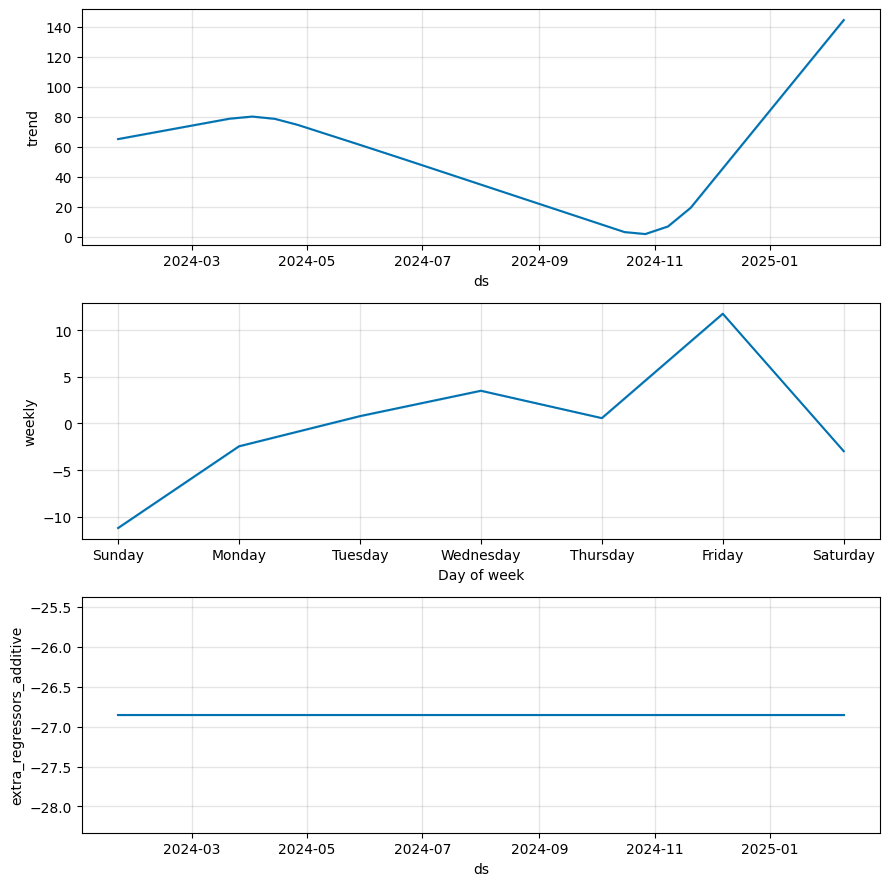

In [12]:
# Plot predictions
fig1 = model.plot(forecast)
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
train = df_prophet
test = df_prophet.tail(7)  # For example, we can use the last 7 data points for testing

# The actual values for the last 7 days in the test set
actual_values = test['y']

# The predicted values from the Prophet model (forecasted)
predicted_values = forecast['yhat'].tail(7)

# 1. MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, predicted_values)
print(f"MAE: {mae}")

# 2. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")

# 3. MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(actual_values,predicted_values)
print(f"MAPE: {mape}")

MAE: 52.338814362755166
RMSE: 57.22366406176998
MAPE: 1.1942832814357305


# Hyperparameter Optimization

In [14]:
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterGrid

# Define a grid of hyperparameters to search
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [10, 50, 100, 500],
    'holidays_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic']
}

# Perform cross-validation on different hyperparameters
best_score = float('inf')
best_params = {}

grid = ParameterGrid(param_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 192


In [15]:
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterGrid

# Define a grid of hyperparameters to search
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [10, 50, 100, 500],
    'holidays_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic']  # logistic requires a 'cap' column
}

# Initialize the cross-validation result
best_score = float('inf')
best_params = {}

grid = ParameterGrid(param_grid)
cnt = 0

for p in grid:
    cnt += 1
    print(f"Model {cnt} with parameters: {p}")
    
    # Initialize and train the model with the hyperparameters
    model = Prophet(
        changepoint_prior_scale=p['changepoint_prior_scale'],
        seasonality_prior_scale=p['seasonality_prior_scale'],
        holidays_prior_scale=p['holidays_prior_scale'],
        seasonality_mode=p['seasonality_mode'],
        growth=p['growth']
    )
    model.add_regressor('click_count')
    model.add_regressor('month')
    model.add_regressor('impression_count')
    model.add_regressor('weekday')
    model.add_regressor('dayofyear')
    model.add_regressor('is_weekend')
    model.add_regressor('is_holiday')
    
    # If using logistic growth, add a 'cap' column
    if p['growth'] == 'logistic':
        df_prophet['cap'] = df_prophet['y'].max() * 1.1  # 10% above the max value of y

    # Fit the model
    model.fit(df_prophet)
    
    # Perform cross-validation
    df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='7 days')
    
    # Get the performance metrics
    df_p = performance_metrics(df_cv)
    
    # Assume that we use RMSE as our score for optimization
    rmse_score = df_p['rmse'].mean()
    
    # Keep track of the best parameters based on RMSE
    if rmse_score < best_score:
        best_score = rmse_score
        best_params = p
    
    print(f"RMSE: {rmse_score} for parameters: {p}")
    
print(f"Best Hyperparameters: {best_params} with RMSE: {best_score}")


Model 1 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:40:57 - cmdstanpy - INFO - Chain [1] start processing
15:40:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:40:57 - cmdstanpy - INFO - Chain [1] start processing
15:40:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


RMSE: 20.065189368112613 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 2 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:40:58 - cmdstanpy - INFO - Chain [1] start processing
15:40:58 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:40:58 - cmdstanpy - INFO - Chain [1] start processing
15:40:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


RMSE: 20.072049683285776 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 3 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:40:59 - cmdstanpy - INFO - Chain [1] start processing
15:40:59 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:40:59 - cmdstanpy - INFO - Chain [1] start processing
15:40:59 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


RMSE: 20.07225964102636 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 4 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:00 - cmdstanpy - INFO - Chain [1] start processing
15:41:00 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:00 - cmdstanpy - INFO - Chain [1] start processing
15:41:00 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


RMSE: 20.072835552133316 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 5 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:41:00 - cmdstanpy - INFO - Chain [1] start processing
15:41:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:01 - cmdstanpy - INFO - Chain [1] start processing
15:41:01 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


RMSE: 50.645315651250485 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 6 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:41:01 - cmdstanpy - INFO - Chain [1] start processing
15:41:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:02 - cmdstanpy - INFO - Chain [1] start processing
15:41:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


RMSE: 50.644483536299894 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 7 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:41:02 - cmdstanpy - INFO - Chain [1] start processing
15:41:02 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:03 - cmdstanpy - INFO - Chain [1] start processing
15:41:03 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


RMSE: 50.64445136372568 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 8 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:41:03 - cmdstanpy - INFO - Chain [1] start processing
15:41:03 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:04 - cmdstanpy - INFO - Chain [1] start processing
15:41:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


RMSE: 50.64442896894376 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 9 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:41:04 - cmdstanpy - INFO - Chain [1] start processing
15:41:04 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:04 - cmdstanpy - INFO - Chain [1] start processing
15:41:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


RMSE: 32.68692299379149 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 10 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:41:05 - cmdstanpy - INFO - Chain [1] start processing
15:41:05 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:05 - cmdstanpy - INFO - Chain [1] start processing
15:41:05 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


RMSE: 32.70969072137532 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 11 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:41:06 - cmdstanpy - INFO - Chain [1] start processing
15:41:06 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:06 - cmdstanpy - INFO - Chain [1] start processing
15:41:06 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


RMSE: 32.70968048714699 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 12 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:07 - cmdstanpy - INFO - Chain [1] start processing
15:41:07 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:07 - cmdstanpy - INFO - Chain [1] start processing
15:41:07 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


RMSE: 32.70968428810354 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 13 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:41:08 - cmdstanpy - INFO - Chain [1] start processing
15:41:08 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:08 - cmdstanpy - INFO - Chain [1] start processing
15:41:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


RMSE: 26.50516741385496 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 14 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:41:08 - cmdstanpy - INFO - Chain [1] start processing
15:41:08 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:09 - cmdstanpy - INFO - Chain [1] start processing
15:41:09 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


RMSE: 26.505113555919625 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 15 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:41:09 - cmdstanpy - INFO - Chain [1] start processing
15:41:09 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:10 - cmdstanpy - INFO - Chain [1] start processing
15:41:10 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


RMSE: 26.50511322797771 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 16 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:41:10 - cmdstanpy - INFO - Chain [1] start processing
15:41:10 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:10 - cmdstanpy - INFO - Chain [1] start processing
15:41:10 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


RMSE: 26.505113123321497 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 17 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:41:11 - cmdstanpy - INFO - Chain [1] start processing
15:41:11 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:11 - cmdstanpy - INFO - Chain [1] start processing
15:41:11 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


RMSE: 33.2833175471112 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 18 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:41:12 - cmdstanpy - INFO - Chain [1] start processing
15:41:12 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:12 - cmdstanpy - INFO - Chain [1] start processing
15:41:12 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


RMSE: 33.282664548835626 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 19 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:41:13 - cmdstanpy - INFO - Chain [1] start processing
15:41:13 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:13 - cmdstanpy - INFO - Chain [1] start processing
15:41:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


RMSE: 33.28269807641309 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 20 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:14 - cmdstanpy - INFO - Chain [1] start processing
15:41:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:14 - cmdstanpy - INFO - Chain [1] start processing
15:41:14 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


RMSE: 33.28257669354072 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 21 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:41:14 - cmdstanpy - INFO - Chain [1] start processing
15:41:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:15 - cmdstanpy - INFO - Chain [1] start processing
15:41:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


RMSE: 24.774834024996153 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 22 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:41:15 - cmdstanpy - INFO - Chain [1] start processing
15:41:15 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:16 - cmdstanpy - INFO - Chain [1] start processing
15:41:16 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


RMSE: 24.6611505840406 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 23 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:41:16 - cmdstanpy - INFO - Chain [1] start processing
15:41:16 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:16 - cmdstanpy - INFO - Chain [1] start processing
15:41:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


RMSE: 24.705394276144293 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 24 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:41:17 - cmdstanpy - INFO - Chain [1] start processing
15:41:17 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:17 - cmdstanpy - INFO - Chain [1] start processing
15:41:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


RMSE: 24.74423655612871 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 25 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:41:18 - cmdstanpy - INFO - Chain [1] start processing
15:41:18 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:18 - cmdstanpy - INFO - Chain [1] start processing
15:41:18 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 34.0048780729743 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 26 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:41:19 - cmdstanpy - INFO - Chain [1] start processing
15:41:19 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:19 - cmdstanpy - INFO - Chain [1] start processing
15:41:19 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


RMSE: 33.95261142882869 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 27 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:41:20 - cmdstanpy - INFO - Chain [1] start processing
15:41:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:20 - cmdstanpy - INFO - Chain [1] start processing
15:41:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


RMSE: 33.98483974151118 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 28 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:21 - cmdstanpy - INFO - Chain [1] start processing
15:41:21 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:21 - cmdstanpy - INFO - Chain [1] start processing
15:41:21 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


RMSE: 33.97342649930611 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 29 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:41:22 - cmdstanpy - INFO - Chain [1] start processing
15:41:22 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:22 - cmdstanpy - INFO - Chain [1] start processing
15:41:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


RMSE: 37.18744844614837 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 30 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:41:23 - cmdstanpy - INFO - Chain [1] start processing
15:41:23 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:23 - cmdstanpy - INFO - Chain [1] start processing
15:41:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 37.18744844630438 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 31 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:41:24 - cmdstanpy - INFO - Chain [1] start processing
15:41:24 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:24 - cmdstanpy - INFO - Chain [1] start processing
15:41:24 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 37.18744844630418 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 32 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:41:25 - cmdstanpy - INFO - Chain [1] start processing
15:41:25 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:25 - cmdstanpy - INFO - Chain [1] start processing
15:41:25 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 37.1874484463038 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 33 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:41:26 - cmdstanpy - INFO - Chain [1] start processing
15:41:26 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:26 - cmdstanpy - INFO - Chain [1] start processing
15:41:26 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


RMSE: 31.202818911484623 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 34 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:41:27 - cmdstanpy - INFO - Chain [1] start processing
15:41:27 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:27 - cmdstanpy - INFO - Chain [1] start processing
15:41:27 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


RMSE: 28.868224826811776 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 35 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:41:28 - cmdstanpy - INFO - Chain [1] start processing
15:41:28 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:28 - cmdstanpy - INFO - Chain [1] start processing
15:41:28 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 28.865689811275608 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 36 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:29 - cmdstanpy - INFO - Chain [1] start processing
15:41:29 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:29 - cmdstanpy - INFO - Chain [1] start processing
15:41:29 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


RMSE: 28.85872762655654 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 37 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:41:30 - cmdstanpy - INFO - Chain [1] start processing
15:41:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:30 - cmdstanpy - INFO - Chain [1] start processing
15:41:30 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


RMSE: 37.188915960318226 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 38 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:41:31 - cmdstanpy - INFO - Chain [1] start processing
15:41:31 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:31 - cmdstanpy - INFO - Chain [1] start processing
15:41:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


RMSE: 37.188915960211965 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 39 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:41:32 - cmdstanpy - INFO - Chain [1] start processing
15:41:32 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:32 - cmdstanpy - INFO - Chain [1] start processing
15:41:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


RMSE: 37.18891596021031 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 40 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:41:33 - cmdstanpy - INFO - Chain [1] start processing
15:41:33 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:33 - cmdstanpy - INFO - Chain [1] start processing
15:41:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


RMSE: 37.18891596020892 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 41 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:41:34 - cmdstanpy - INFO - Chain [1] start processing
15:41:34 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:34 - cmdstanpy - INFO - Chain [1] start processing
15:41:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 21.013188263037915 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 42 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:41:35 - cmdstanpy - INFO - Chain [1] start processing
15:41:35 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:35 - cmdstanpy - INFO - Chain [1] start processing
15:41:35 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


RMSE: 21.013176160037705 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 43 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:41:36 - cmdstanpy - INFO - Chain [1] start processing
15:41:36 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:36 - cmdstanpy - INFO - Chain [1] start processing
15:41:36 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


RMSE: 21.01314748249627 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 44 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:37 - cmdstanpy - INFO - Chain [1] start processing
15:41:37 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:37 - cmdstanpy - INFO - Chain [1] start processing
15:41:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 21.013188120544548 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 45 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:41:38 - cmdstanpy - INFO - Chain [1] start processing
15:41:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:38 - cmdstanpy - INFO - Chain [1] start processing
15:41:38 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 37.188930165840745 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 46 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:41:39 - cmdstanpy - INFO - Chain [1] start processing
15:41:39 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:39 - cmdstanpy - INFO - Chain [1] start processing
15:41:39 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


RMSE: 37.188929751720714 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 47 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:41:40 - cmdstanpy - INFO - Chain [1] start processing
15:41:40 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:40 - cmdstanpy - INFO - Chain [1] start processing
15:41:40 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


RMSE: 37.188929751839304 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 48 with parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:41:41 - cmdstanpy - INFO - Chain [1] start processing
15:41:41 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:41 - cmdstanpy - INFO - Chain [1] start processing
15:41:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 37.188929751885404 for parameters: {'changepoint_prior_scale': 0.001, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 49 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:41:42 - cmdstanpy - INFO - Chain [1] start processing
15:41:42 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:42 - cmdstanpy - INFO - Chain [1] start processing
15:41:42 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


RMSE: 15.075159876969272 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 50 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:41:43 - cmdstanpy - INFO - Chain [1] start processing
15:41:43 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:43 - cmdstanpy - INFO - Chain [1] start processing
15:41:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


RMSE: 15.075687025715544 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 51 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


RMSE: 15.07560545957293 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 52 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:45 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


RMSE: 15.074160900148142 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 53 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:41:45 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:46 - cmdstanpy - INFO - Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


RMSE: 45.70456530646329 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 54 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:41:46 - cmdstanpy - INFO - Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:47 - cmdstanpy - INFO - Chain [1] start processing
15:41:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


RMSE: 45.47067413910888 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 55 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:41:47 - cmdstanpy - INFO - Chain [1] start processing
15:41:47 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:48 - cmdstanpy - INFO - Chain [1] start processing
15:41:48 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


RMSE: 45.440489434718465 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 56 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:41:48 - cmdstanpy - INFO - Chain [1] start processing
15:41:48 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:48 - cmdstanpy - INFO - Chain [1] start processing
15:41:48 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


RMSE: 45.764913653149506 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 57 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:41:49 - cmdstanpy - INFO - Chain [1] start processing
15:41:49 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:49 - cmdstanpy - INFO - Chain [1] start processing
15:41:49 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


RMSE: 13.784540795491178 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 58 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:41:50 - cmdstanpy - INFO - Chain [1] start processing
15:41:50 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:50 - cmdstanpy - INFO - Chain [1] start processing
15:41:50 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


RMSE: 13.782120170832831 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 59 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:41:51 - cmdstanpy - INFO - Chain [1] start processing
15:41:51 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:51 - cmdstanpy - INFO - Chain [1] start processing
15:41:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


RMSE: 13.784636184782334 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 60 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:52 - cmdstanpy - INFO - Chain [1] start processing
15:41:52 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:52 - cmdstanpy - INFO - Chain [1] start processing
15:41:52 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


RMSE: 13.784434862560428 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 61 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:41:52 - cmdstanpy - INFO - Chain [1] start processing
15:41:52 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:53 - cmdstanpy - INFO - Chain [1] start processing
15:41:53 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


RMSE: 34.73406115626556 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 62 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:41:53 - cmdstanpy - INFO - Chain [1] start processing
15:41:53 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:54 - cmdstanpy - INFO - Chain [1] start processing
15:41:54 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


RMSE: 35.90751560767397 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 63 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:41:54 - cmdstanpy - INFO - Chain [1] start processing
15:41:54 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


RMSE: 31.02025605336259 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 64 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:41:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:56 - cmdstanpy - INFO - Chain [1] start processing
15:41:56 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


RMSE: 24.963969501493192 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 65 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:41:56 - cmdstanpy - INFO - Chain [1] start processing
15:41:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:57 - cmdstanpy - INFO - Chain [1] start processing
15:41:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


RMSE: 13.977145805300761 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 66 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:41:57 - cmdstanpy - INFO - Chain [1] start processing
15:41:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:57 - cmdstanpy - INFO - Chain [1] start processing
15:41:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


RMSE: 13.975880152425022 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 67 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:41:58 - cmdstanpy - INFO - Chain [1] start processing
15:41:58 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:58 - cmdstanpy - INFO - Chain [1] start processing
15:41:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


RMSE: 13.975898235457851 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 68 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:41:59 - cmdstanpy - INFO - Chain [1] start processing
15:41:59 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:41:59 - cmdstanpy - INFO - Chain [1] start processing
15:41:59 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


RMSE: 13.975903851783128 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 69 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:42:00 - cmdstanpy - INFO - Chain [1] start processing
15:42:00 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:00 - cmdstanpy - INFO - Chain [1] start processing
15:42:00 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


RMSE: 18.354773031758278 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 70 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:42:01 - cmdstanpy - INFO - Chain [1] start processing
15:42:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:01 - cmdstanpy - INFO - Chain [1] start processing
15:42:01 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


RMSE: 19.226761535049185 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 71 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:42:02 - cmdstanpy - INFO - Chain [1] start processing
15:42:02 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:02 - cmdstanpy - INFO - Chain [1] start processing
15:42:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


RMSE: 19.22459319838784 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 72 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:42:03 - cmdstanpy - INFO - Chain [1] start processing
15:42:03 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:03 - cmdstanpy - INFO - Chain [1] start processing
15:42:03 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


RMSE: 19.23004866408569 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 73 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:42:04 - cmdstanpy - INFO - Chain [1] start processing
15:42:04 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:04 - cmdstanpy - INFO - Chain [1] start processing
15:42:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


RMSE: 15.911822287075116 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 74 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:42:04 - cmdstanpy - INFO - Chain [1] start processing
15:42:05 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:05 - cmdstanpy - INFO - Chain [1] start processing
15:42:05 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


RMSE: 15.914799815651532 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 75 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:42:05 - cmdstanpy - INFO - Chain [1] start processing
15:42:06 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:06 - cmdstanpy - INFO - Chain [1] start processing
15:42:06 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


RMSE: 15.91481882453741 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 76 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:42:06 - cmdstanpy - INFO - Chain [1] start processing
15:42:07 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:07 - cmdstanpy - INFO - Chain [1] start processing
15:42:07 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


RMSE: 15.914768376716973 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 77 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:42:07 - cmdstanpy - INFO - Chain [1] start processing
15:42:08 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:08 - cmdstanpy - INFO - Chain [1] start processing
15:42:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


RMSE: 19.90523699661753 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 78 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:42:08 - cmdstanpy - INFO - Chain [1] start processing
15:42:09 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:09 - cmdstanpy - INFO - Chain [1] start processing
15:42:09 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 19.905300050979502 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 79 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:42:10 - cmdstanpy - INFO - Chain [1] start processing
15:42:10 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:10 - cmdstanpy - INFO - Chain [1] start processing
15:42:10 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


RMSE: 19.905238935891152 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 80 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:42:11 - cmdstanpy - INFO - Chain [1] start processing
15:42:11 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:11 - cmdstanpy - INFO - Chain [1] start processing
15:42:11 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


RMSE: 19.905240478921566 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 81 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:42:12 - cmdstanpy - INFO - Chain [1] start processing
15:42:12 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:12 - cmdstanpy - INFO - Chain [1] start processing
15:42:12 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 14.426898291404342 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 82 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:42:13 - cmdstanpy - INFO - Chain [1] start processing
15:42:13 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:13 - cmdstanpy - INFO - Chain [1] start processing
15:42:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


RMSE: 14.426525630801034 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 83 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:42:14 - cmdstanpy - INFO - Chain [1] start processing
15:42:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:14 - cmdstanpy - INFO - Chain [1] start processing
15:42:14 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 14.426688042599071 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 84 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:42:15 - cmdstanpy - INFO - Chain [1] start processing
15:42:15 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:15 - cmdstanpy - INFO - Chain [1] start processing
15:42:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


RMSE: 14.426542470251599 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 85 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:42:16 - cmdstanpy - INFO - Chain [1] start processing
15:42:16 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:16 - cmdstanpy - INFO - Chain [1] start processing
15:42:16 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 19.154898147148213 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 86 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:42:17 - cmdstanpy - INFO - Chain [1] start processing
15:42:17 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:17 - cmdstanpy - INFO - Chain [1] start processing
15:42:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 19.165776894825342 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 87 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:42:18 - cmdstanpy - INFO - Chain [1] start processing
15:42:18 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:18 - cmdstanpy - INFO - Chain [1] start processing
15:42:18 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


RMSE: 19.163175894717796 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 88 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:42:19 - cmdstanpy - INFO - Chain [1] start processing
15:42:19 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:19 - cmdstanpy - INFO - Chain [1] start processing
15:42:19 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


RMSE: 19.163303782137422 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 89 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:42:20 - cmdstanpy - INFO - Chain [1] start processing
15:42:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:20 - cmdstanpy - INFO - Chain [1] start processing
15:42:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


RMSE: 14.381122268144443 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 90 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:42:21 - cmdstanpy - INFO - Chain [1] start processing
15:42:21 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:21 - cmdstanpy - INFO - Chain [1] start processing
15:42:21 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


RMSE: 14.381306287573574 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 91 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:42:22 - cmdstanpy - INFO - Chain [1] start processing
15:42:22 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:22 - cmdstanpy - INFO - Chain [1] start processing
15:42:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


RMSE: 14.381306874270589 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 92 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:42:23 - cmdstanpy - INFO - Chain [1] start processing
15:42:23 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:23 - cmdstanpy - INFO - Chain [1] start processing
15:42:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 14.381304040925595 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 93 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:42:24 - cmdstanpy - INFO - Chain [1] start processing
15:42:24 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:24 - cmdstanpy - INFO - Chain [1] start processing
15:42:24 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 19.71793219196917 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 94 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:42:25 - cmdstanpy - INFO - Chain [1] start processing
15:42:25 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:25 - cmdstanpy - INFO - Chain [1] start processing
15:42:25 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 19.83045379437794 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 95 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:42:26 - cmdstanpy - INFO - Chain [1] start processing
15:42:26 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:26 - cmdstanpy - INFO - Chain [1] start processing
15:42:26 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


RMSE: 19.570958158515825 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 96 with parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:42:27 - cmdstanpy - INFO - Chain [1] start processing
15:42:27 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:27 - cmdstanpy - INFO - Chain [1] start processing
15:42:27 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


RMSE: 20.66237744123701 for parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 97 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:42:28 - cmdstanpy - INFO - Chain [1] start processing
15:42:28 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:28 - cmdstanpy - INFO - Chain [1] start processing
15:42:28 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


RMSE: 55.667398558524575 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 98 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:42:29 - cmdstanpy - INFO - Chain [1] start processing
15:42:29 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:29 - cmdstanpy - INFO - Chain [1] start processing
15:42:29 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


RMSE: 60.13779275201013 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 99 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:42:30 - cmdstanpy - INFO - Chain [1] start processing
15:42:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:30 - cmdstanpy - INFO - Chain [1] start processing
15:42:30 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


RMSE: 61.26124254758697 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 100 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:42:31 - cmdstanpy - INFO - Chain [1] start processing
15:42:31 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:31 - cmdstanpy - INFO - Chain [1] start processing
15:42:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


RMSE: 57.08342074396717 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 101 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:42:32 - cmdstanpy - INFO - Chain [1] start processing
15:42:32 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:32 - cmdstanpy - INFO - Chain [1] start processing
15:42:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


RMSE: 116.53984377250647 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 102 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:42:33 - cmdstanpy - INFO - Chain [1] start processing
15:42:33 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:33 - cmdstanpy - INFO - Chain [1] start processing
15:42:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


RMSE: 116.05047228319313 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 103 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:42:34 - cmdstanpy - INFO - Chain [1] start processing
15:42:34 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:34 - cmdstanpy - INFO - Chain [1] start processing
15:42:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


RMSE: 115.89113234932572 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 104 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:42:35 - cmdstanpy - INFO - Chain [1] start processing
15:42:35 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:35 - cmdstanpy - INFO - Chain [1] start processing
15:42:35 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


RMSE: 115.412412416545 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 105 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:42:36 - cmdstanpy - INFO - Chain [1] start processing
15:42:36 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:36 - cmdstanpy - INFO - Chain [1] start processing
15:42:36 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


RMSE: 56.225116953009874 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 106 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


RMSE: 57.60049275400638 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 107 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:42:38 - cmdstanpy - INFO - Chain [1] start processing
15:42:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:38 - cmdstanpy - INFO - Chain [1] start processing
15:42:38 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


RMSE: 57.95209383700795 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 108 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:42:38 - cmdstanpy - INFO - Chain [1] start processing
15:42:39 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:39 - cmdstanpy - INFO - Chain [1] start processing
15:42:39 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


RMSE: 55.86949855471016 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 109 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:42:39 - cmdstanpy - INFO - Chain [1] start processing
15:42:40 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:40 - cmdstanpy - INFO - Chain [1] start processing
15:42:40 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


RMSE: 47.12350209840243 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 110 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:42:40 - cmdstanpy - INFO - Chain [1] start processing
15:42:40 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:41 - cmdstanpy - INFO - Chain [1] start processing
15:42:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


RMSE: 47.08001210402262 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 111 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:42:41 - cmdstanpy - INFO - Chain [1] start processing
15:42:41 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:42 - cmdstanpy - INFO - Chain [1] start processing
15:42:42 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


RMSE: 47.65428111504589 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 112 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:42:42 - cmdstanpy - INFO - Chain [1] start processing
15:42:42 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:43 - cmdstanpy - INFO - Chain [1] start processing
15:42:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


RMSE: 47.7313973918444 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 113 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:42:43 - cmdstanpy - INFO - Chain [1] start processing
15:42:43 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:44 - cmdstanpy - INFO - Chain [1] start processing
15:42:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


RMSE: 54.81554648649194 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 114 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:42:44 - cmdstanpy - INFO - Chain [1] start processing
15:42:44 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:45 - cmdstanpy - INFO - Chain [1] start processing
15:42:45 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


RMSE: 56.30220109032608 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 115 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:42:45 - cmdstanpy - INFO - Chain [1] start processing
15:42:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:46 - cmdstanpy - INFO - Chain [1] start processing
15:42:46 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


RMSE: 57.43463663169468 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 116 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:42:46 - cmdstanpy - INFO - Chain [1] start processing
15:42:46 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:47 - cmdstanpy - INFO - Chain [1] start processing
15:42:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


RMSE: 56.15544246827163 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 117 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:42:47 - cmdstanpy - INFO - Chain [1] start processing
15:42:47 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:48 - cmdstanpy - INFO - Chain [1] start processing
15:42:48 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


RMSE: 35.922517241922186 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 118 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:42:48 - cmdstanpy - INFO - Chain [1] start processing
15:42:48 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:48 - cmdstanpy - INFO - Chain [1] start processing
15:42:49 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


RMSE: 36.43881923178007 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 119 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:42:49 - cmdstanpy - INFO - Chain [1] start processing
15:42:49 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:50 - cmdstanpy - INFO - Chain [1] start processing
15:42:50 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


RMSE: 35.72380705057387 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 120 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:42:50 - cmdstanpy - INFO - Chain [1] start processing
15:42:50 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:51 - cmdstanpy - INFO - Chain [1] start processing
15:42:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


RMSE: 37.66879852813929 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 121 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:42:51 - cmdstanpy - INFO - Chain [1] start processing
15:42:51 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:52 - cmdstanpy - INFO - Chain [1] start processing
15:42:52 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 14.696805792834981 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 122 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:42:52 - cmdstanpy - INFO - Chain [1] start processing
15:42:52 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:53 - cmdstanpy - INFO - Chain [1] start processing
15:42:53 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


RMSE: 14.688334877396537 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 123 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:42:53 - cmdstanpy - INFO - Chain [1] start processing
15:42:53 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


RMSE: 14.686848006755131 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 124 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:55 - cmdstanpy - INFO - Chain [1] start processing
15:42:55 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 14.685011664170359 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 125 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:42:55 - cmdstanpy - INFO - Chain [1] start processing
15:42:55 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:56 - cmdstanpy - INFO - Chain [1] start processing
15:42:56 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 54.491294162827316 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 126 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:42:56 - cmdstanpy - INFO - Chain [1] start processing
15:42:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:57 - cmdstanpy - INFO - Chain [1] start processing
15:42:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 54.49967721123302 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 127 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:42:57 - cmdstanpy - INFO - Chain [1] start processing
15:42:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:58 - cmdstanpy - INFO - Chain [1] start processing
15:42:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


RMSE: 54.489139745093944 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 128 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:42:58 - cmdstanpy - INFO - Chain [1] start processing
15:42:58 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:42:59 - cmdstanpy - INFO - Chain [1] start processing
15:42:59 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


RMSE: 54.49909016657411 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 129 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:42:59 - cmdstanpy - INFO - Chain [1] start processing
15:42:59 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:00 - cmdstanpy - INFO - Chain [1] start processing
15:43:00 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


RMSE: 19.233439179742252 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 130 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:43:00 - cmdstanpy - INFO - Chain [1] start processing
15:43:00 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:01 - cmdstanpy - INFO - Chain [1] start processing
15:43:01 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


RMSE: 17.179276523046635 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 131 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:43:01 - cmdstanpy - INFO - Chain [1] start processing
15:43:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:02 - cmdstanpy - INFO - Chain [1] start processing
15:43:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


RMSE: 17.987417436749787 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 132 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:43:02 - cmdstanpy - INFO - Chain [1] start processing
15:43:03 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:03 - cmdstanpy - INFO - Chain [1] start processing
15:43:03 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


RMSE: 19.594999575870407 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 133 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:43:03 - cmdstanpy - INFO - Chain [1] start processing
15:43:04 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:04 - cmdstanpy - INFO - Chain [1] start processing
15:43:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


RMSE: 29.570760040740133 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 134 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:43:05 - cmdstanpy - INFO - Chain [1] start processing
15:43:05 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:05 - cmdstanpy - INFO - Chain [1] start processing
15:43:05 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


RMSE: 29.058571226990676 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 135 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:43:06 - cmdstanpy - INFO - Chain [1] start processing
15:43:06 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:06 - cmdstanpy - INFO - Chain [1] start processing
15:43:06 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


RMSE: 29.027155199468016 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 136 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:43:07 - cmdstanpy - INFO - Chain [1] start processing
15:43:07 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:07 - cmdstanpy - INFO - Chain [1] start processing
15:43:07 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 28.980051158943485 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 137 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:43:08 - cmdstanpy - INFO - Chain [1] start processing
15:43:08 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:08 - cmdstanpy - INFO - Chain [1] start processing
15:43:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


RMSE: 17.063998137540427 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 138 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:43:09 - cmdstanpy - INFO - Chain [1] start processing
15:43:09 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:09 - cmdstanpy - INFO - Chain [1] start processing
15:43:09 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


RMSE: 18.04371686140247 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 139 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:43:10 - cmdstanpy - INFO - Chain [1] start processing
15:43:10 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:10 - cmdstanpy - INFO - Chain [1] start processing
15:43:10 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


RMSE: 17.817675003836978 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 140 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:43:11 - cmdstanpy - INFO - Chain [1] start processing
15:43:11 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:11 - cmdstanpy - INFO - Chain [1] start processing
15:43:11 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


RMSE: 17.833269538177014 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 141 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:43:12 - cmdstanpy - INFO - Chain [1] start processing
15:43:12 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:12 - cmdstanpy - INFO - Chain [1] start processing
15:43:12 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


RMSE: 17.005704515245718 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 142 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:43:13 - cmdstanpy - INFO - Chain [1] start processing
15:43:13 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:13 - cmdstanpy - INFO - Chain [1] start processing
15:43:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


RMSE: 16.920941820807922 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 143 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:43:14 - cmdstanpy - INFO - Chain [1] start processing
15:43:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:14 - cmdstanpy - INFO - Chain [1] start processing
15:43:14 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 16.94634382320059 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 144 with parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:43:15 - cmdstanpy - INFO - Chain [1] start processing
15:43:15 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:15 - cmdstanpy - INFO - Chain [1] start processing
15:43:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


RMSE: 16.682490909448013 for parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 145 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:43:16 - cmdstanpy - INFO - Chain [1] start processing
15:43:16 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:16 - cmdstanpy - INFO - Chain [1] start processing
15:43:16 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


RMSE: 79.77648101240905 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 146 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:43:17 - cmdstanpy - INFO - Chain [1] start processing
15:43:17 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:17 - cmdstanpy - INFO - Chain [1] start processing
15:43:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


RMSE: 78.39768520625259 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 147 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:43:18 - cmdstanpy - INFO - Chain [1] start processing
15:43:18 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:18 - cmdstanpy - INFO - Chain [1] start processing
15:43:18 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


RMSE: 78.21018065320757 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 148 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:43:19 - cmdstanpy - INFO - Chain [1] start processing
15:43:19 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:19 - cmdstanpy - INFO - Chain [1] start processing
15:43:19 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


RMSE: 78.35784204560443 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 149 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:43:20 - cmdstanpy - INFO - Chain [1] start processing
15:43:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:20 - cmdstanpy - INFO - Chain [1] start processing
15:43:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


RMSE: 127.45433876056647 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 150 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:43:21 - cmdstanpy - INFO - Chain [1] start processing
15:43:21 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:21 - cmdstanpy - INFO - Chain [1] start processing
15:43:21 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


RMSE: 127.42852707739807 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 151 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:43:22 - cmdstanpy - INFO - Chain [1] start processing
15:43:22 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:22 - cmdstanpy - INFO - Chain [1] start processing
15:43:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


RMSE: 127.21237934533477 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 152 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:43:23 - cmdstanpy - INFO - Chain [1] start processing
15:43:23 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:23 - cmdstanpy - INFO - Chain [1] start processing
15:43:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


RMSE: 127.63874975727698 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 153 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:43:24 - cmdstanpy - INFO - Chain [1] start processing
15:43:24 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:24 - cmdstanpy - INFO - Chain [1] start processing
15:43:24 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


RMSE: 74.5909249245595 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 154 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:43:25 - cmdstanpy - INFO - Chain [1] start processing
15:43:25 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:25 - cmdstanpy - INFO - Chain [1] start processing
15:43:25 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


RMSE: 75.00075257722558 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 155 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:43:26 - cmdstanpy - INFO - Chain [1] start processing
15:43:26 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:26 - cmdstanpy - INFO - Chain [1] start processing
15:43:26 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


RMSE: 75.19430927598783 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 156 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:43:27 - cmdstanpy - INFO - Chain [1] start processing
15:43:27 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:27 - cmdstanpy - INFO - Chain [1] start processing
15:43:27 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


RMSE: 75.35654563985975 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 157 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:43:28 - cmdstanpy - INFO - Chain [1] start processing
15:43:28 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:28 - cmdstanpy - INFO - Chain [1] start processing
15:43:28 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


RMSE: 50.996021854586765 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 158 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:43:29 - cmdstanpy - INFO - Chain [1] start processing
15:43:29 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:29 - cmdstanpy - INFO - Chain [1] start processing
15:43:29 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


RMSE: 51.28690612990595 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 159 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:43:29 - cmdstanpy - INFO - Chain [1] start processing
15:43:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:30 - cmdstanpy - INFO - Chain [1] start processing
15:43:30 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


RMSE: 50.86082143715315 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 160 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:43:30 - cmdstanpy - INFO - Chain [1] start processing
15:43:31 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:31 - cmdstanpy - INFO - Chain [1] start processing
15:43:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


RMSE: 51.09172561240756 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 161 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:43:31 - cmdstanpy - INFO - Chain [1] start processing
15:43:32 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:32 - cmdstanpy - INFO - Chain [1] start processing
15:43:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


RMSE: 74.74987459813772 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 162 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:43:32 - cmdstanpy - INFO - Chain [1] start processing
15:43:33 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:33 - cmdstanpy - INFO - Chain [1] start processing
15:43:33 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


RMSE: 73.87597897045991 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 163 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:43:34 - cmdstanpy - INFO - Chain [1] start processing
15:43:34 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:34 - cmdstanpy - INFO - Chain [1] start processing
15:43:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


RMSE: 76.31954349361499 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 164 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:43:35 - cmdstanpy - INFO - Chain [1] start processing
15:43:35 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:35 - cmdstanpy - INFO - Chain [1] start processing
15:43:35 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


RMSE: 74.24906928089797 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 165 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:43:36 - cmdstanpy - INFO - Chain [1] start processing
15:43:36 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:36 - cmdstanpy - INFO - Chain [1] start processing
15:43:36 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


RMSE: 44.285281374405315 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 166 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:43:37 - cmdstanpy - INFO - Chain [1] start processing
15:43:37 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:37 - cmdstanpy - INFO - Chain [1] start processing
15:43:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


RMSE: 44.95075057931883 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 167 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:43:38 - cmdstanpy - INFO - Chain [1] start processing
15:43:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:38 - cmdstanpy - INFO - Chain [1] start processing
15:43:38 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


RMSE: 43.7832240157741 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 168 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


RMSE: 44.731571033604844 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 169 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:43:40 - cmdstanpy - INFO - Chain [1] start processing
15:43:40 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:40 - cmdstanpy - INFO - Chain [1] start processing
15:43:40 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


RMSE: 30.85759730671445 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 170 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:43:41 - cmdstanpy - INFO - Chain [1] start processing
15:43:41 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:41 - cmdstanpy - INFO - Chain [1] start processing
15:43:42 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


RMSE: 31.47492015362356 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 171 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:43:42 - cmdstanpy - INFO - Chain [1] start processing
15:43:42 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:43 - cmdstanpy - INFO - Chain [1] start processing
15:43:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


RMSE: 29.538274712213205 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 172 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:43:43 - cmdstanpy - INFO - Chain [1] start processing
15:43:43 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:44 - cmdstanpy - INFO - Chain [1] start processing
15:43:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


RMSE: 30.27222987089795 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 173 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:43:45 - cmdstanpy - INFO - Chain [1] start processing
15:43:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:45 - cmdstanpy - INFO - Chain [1] start processing
15:43:45 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


RMSE: 105.12351520828203 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 174 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:43:46 - cmdstanpy - INFO - Chain [1] start processing
15:43:46 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:46 - cmdstanpy - INFO - Chain [1] start processing
15:43:46 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


RMSE: 104.63253853785402 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 175 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:43:47 - cmdstanpy - INFO - Chain [1] start processing
15:43:47 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:47 - cmdstanpy - INFO - Chain [1] start processing
15:43:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


RMSE: 104.99358820428733 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 176 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:43:48 - cmdstanpy - INFO - Chain [1] start processing
15:43:48 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:48 - cmdstanpy - INFO - Chain [1] start processing
15:43:48 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


RMSE: 107.25386467181967 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 177 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:43:49 - cmdstanpy - INFO - Chain [1] start processing
15:43:49 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:49 - cmdstanpy - INFO - Chain [1] start processing
15:43:49 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


RMSE: 46.540961384665174 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 178 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:43:50 - cmdstanpy - INFO - Chain [1] start processing
15:43:50 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:50 - cmdstanpy - INFO - Chain [1] start processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


RMSE: 50.972507882618814 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 179 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:43:51 - cmdstanpy - INFO - Chain [1] start processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


RMSE: 45.35524032781983 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 180 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:53 - cmdstanpy - INFO - Chain [1] start processing
15:43:53 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


RMSE: 50.51684019370344 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 181 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:43:53 - cmdstanpy - INFO - Chain [1] start processing
15:43:53 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:54 - cmdstanpy - INFO - Chain [1] start processing
15:43:54 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


RMSE: 59.73659137825167 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 182 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:43:54 - cmdstanpy - INFO - Chain [1] start processing
15:43:55 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:55 - cmdstanpy - INFO - Chain [1] start processing
15:43:55 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


RMSE: 60.40396473807166 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 183 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:43:56 - cmdstanpy - INFO - Chain [1] start processing
15:43:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:56 - cmdstanpy - INFO - Chain [1] start processing
15:43:56 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


RMSE: 58.782623554585435 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 184 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:43:57 - cmdstanpy - INFO - Chain [1] start processing
15:43:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:57 - cmdstanpy - INFO - Chain [1] start processing
15:43:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


RMSE: 55.73725730390434 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Model 185 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


15:43:58 - cmdstanpy - INFO - Chain [1] start processing
15:43:58 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:58 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


RMSE: 66.48626743377562 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
Model 186 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}


15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:44:00 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


RMSE: 64.91170827081756 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50}
Model 187 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}


15:44:00 - cmdstanpy - INFO - Chain [1] start processing
15:44:00 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:44:01 - cmdstanpy - INFO - Chain [1] start processing
15:44:01 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


RMSE: 64.26264053311914 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 100}
Model 188 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}


15:44:01 - cmdstanpy - INFO - Chain [1] start processing
15:44:02 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:44:02 - cmdstanpy - INFO - Chain [1] start processing
15:44:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


RMSE: 61.591669228165465 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 500}
Model 189 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


15:44:03 - cmdstanpy - INFO - Chain [1] start processing
15:44:03 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:44:03 - cmdstanpy - INFO - Chain [1] start processing
15:44:03 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


RMSE: 38.462168821915625 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}
Model 190 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}


15:44:04 - cmdstanpy - INFO - Chain [1] start processing
15:44:04 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:44:04 - cmdstanpy - INFO - Chain [1] start processing
15:44:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


RMSE: 33.742890172764156 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 50}
Model 191 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}


15:44:05 - cmdstanpy - INFO - Chain [1] start processing
15:44:05 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:44:05 - cmdstanpy - INFO - Chain [1] start processing
15:44:05 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


RMSE: 36.91796340457948 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 100}
Model 192 with parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}


15:44:06 - cmdstanpy - INFO - Chain [1] start processing
15:44:06 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]15:44:06 - cmdstanpy - INFO - Chain [1] start processing
15:44:06 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

RMSE: 33.416334090252946 for parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 500}
Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 50} with RMSE: 13.782120170832831


In [16]:
# Initialize the model with the best parameters from the grid search
model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    growth=best_params['growth']
)

# Add regressors and train as before
model.add_regressor('click_count')
model.add_regressor('month')
model.add_regressor('impression_count')
model.add_regressor('weekday')
model.add_regressor('dayofyear')
model.add_regressor('is_weekend')
model.add_regressor('is_holiday')

if best_params['growth'] == 'logistic':
    df_prophet['cap'] = df_prophet['y'].max() * 1.1  # Adjust cap for logistic growth

model.fit(df_prophet)



15:44:07 - cmdstanpy - INFO - Chain [1] start processing
15:44:07 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Create a future dataframe (7 days ahead)
future = model.make_future_dataframe(periods=7)

# Add the necessary columns for future prediction
future['click_count'] = df_prophet['click_count'].iloc[-1]
future['month'] = df_prophet['month'].iloc[-1]
future['impression_count'] = df_prophet['impression_count'].iloc[-1]
future['weekday'] = df_prophet['weekday'].iloc[-1]
future['dayofyear'] = df_prophet['dayofyear'].iloc[-1]
future['is_weekend'] = df_prophet['is_weekend'].iloc[-1]
future['is_holiday'] = df_prophet['is_holiday'].iloc[-1]

# Make predictions
forecast = model.predict(future)

# Show the forecast for the next 7 days
forecast_7_days = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(forecast_7_days)


            ds       yhat  yhat_lower  yhat_upper
0   2024-01-22  54.128385  -36.879828  149.127429
1   2024-01-23  58.184599  -35.512985  149.936593
2   2024-01-24  56.821807  -40.736880  146.254520
3   2024-01-25  54.215409  -39.027101  145.776558
4   2024-01-26  65.661491  -35.048903  156.246196
..         ...        ...         ...         ...
372 2025-02-05  84.246170   -4.547114  177.268277
373 2025-02-06  81.639879  -11.085984  168.398236
374 2025-02-07  93.086067    5.118182  185.025294
375 2025-02-08  84.249937   -8.599558  171.110015
376 2025-02-09  75.984392  -21.738277  166.769398

[377 rows x 4 columns]


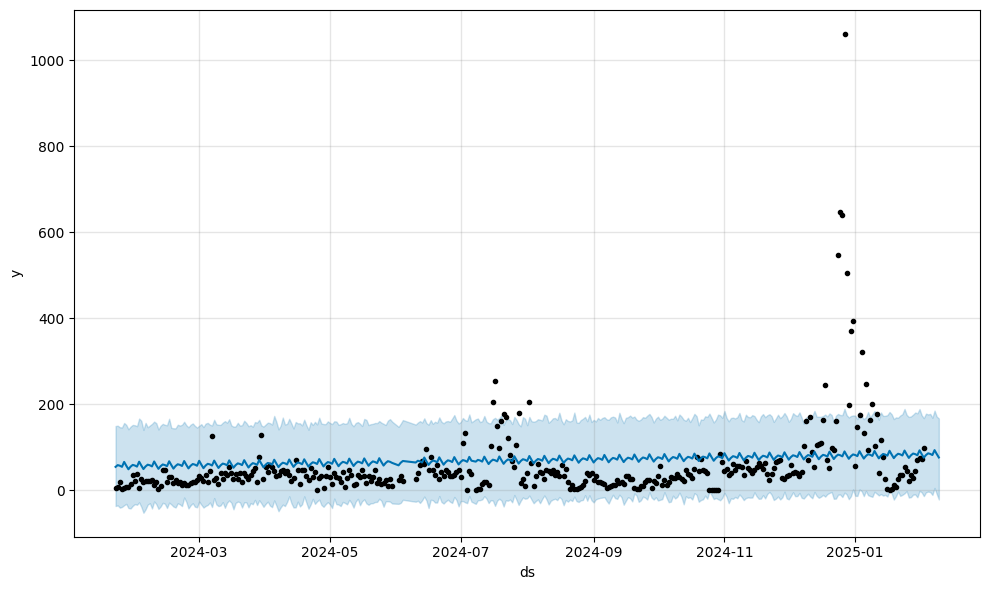

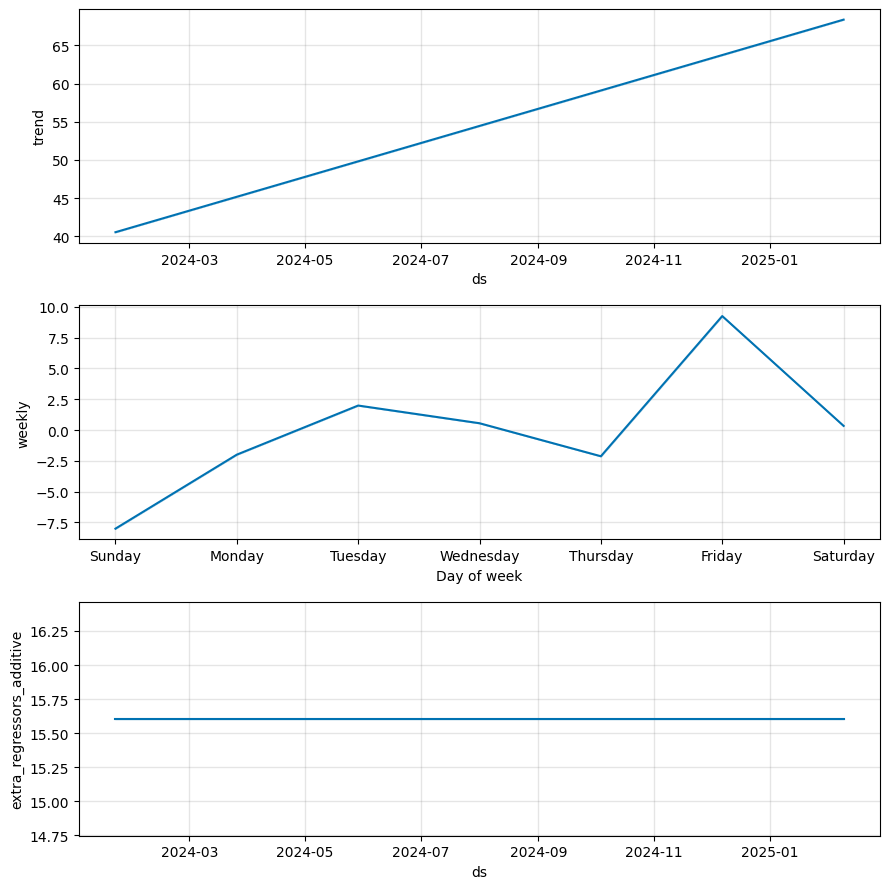

In [18]:
# Plot predictions
fig1 = model.plot(forecast)
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

In [19]:
# Split the data into training and testing
train = df_prophet
test = df_prophet.tail(7)  # Use the last 7 days for testing

# Actual values for the last 7 days (from test set)
actual_values = test['y']

# Predicted values from the forecast (7 days ahead)
predicted_values = forecast['yhat'].tail(7)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, predicted_values)
print(f"MAE: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE: {mape}")


MAE: 29.628435977744385
RMSE: 33.92242123782328
MAPE: 0.7093089843088014


In [20]:
best_params

{'changepoint_prior_scale': 0.01,
 'growth': 'linear',
 'holidays_prior_scale': 0.1,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 50}